# [파이썬 머신러닝 완벽 가이드] <br>
# 05 회귀

## 05-1 회귀 소개 <br>
- 회귀 (Regression)
    - 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
    - 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
    - Y = W1X1 + W2X2+ ... + W3X3
    - 종속변수: 결정 값 (Y)
    - 독립변수: 피처 (X1, X2, ..., Xn)
    - 회귀 계수(Regression coefficients): 독립변수의 값에 영향을 미침 (W1, W2, ..., Wn)
        - 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것임 <br>
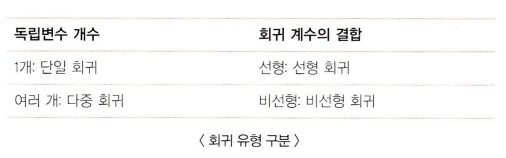 <br>
- 지도 학습: 분류 (Classification), 회귀 (Regression) <br>
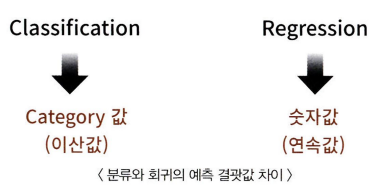 <br>

#### 선형 회귀 (Linear Regression)
- 실제 값과 예측값의 차이 (오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화하는 방식
- 선형 회귀 모델은 규제 (Regularization: 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것) 방법에 따라 다시 별도의 유형으로 나뉠 수 있음
- 대표적인 선형 회귀 모델
    - `일반 선형 회귀`: 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델임.
    - `릿지 (Ridge)`: 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델임. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델임.
    - `라쏘 (Lasso)`: 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식으로 L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해,  L1 규제는 예측 영향력이 적은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것임. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불림.
    - `엘라스틱넷 (LeasticNet)`: L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 셋에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함.
    - `로지스틱 회귀 (Logistic Regression)`: 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델임. 로지스틱 회귀는 매우 강력한 분류 알고리즘임. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.

## 05-2 단순 선형 회귀를 통한 회귀 이해 <br>
- 단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형 회귀 <br><br>

#### EX) Y: 주택 가격, X: 주택 크기
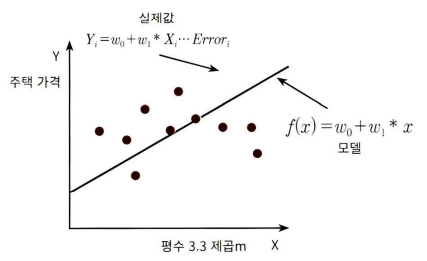
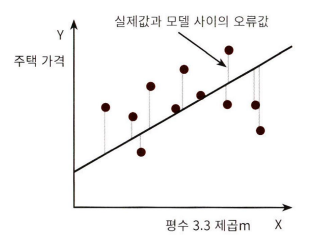 <br>
- 실제 값과 회귀 모델의 차이에 따른 오류값: 잔차 <br>
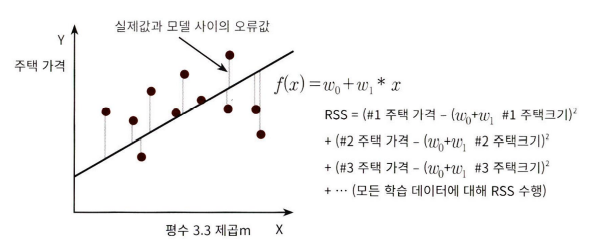 <br>
- `RSS (Residual Sum of Square) 방식`: 오류값의 제곱을 구해서 더하는 방식 <br>
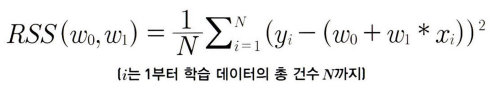 <br>
- 회귀에서 RSS는 비용(Cost)이며, w 변수(회귀 계수)로 구성되는 RSS를 비용 함수라고 함
- 머신 러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값 (오류값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것임
- 비용 함수를 `손실 함수 (loss function)`이라고도 함

## 05-3 비용 최소화하기 - 경사 하강법 (Gradient Descent) 소개 <br>
- `경사 하강법 (Gradient Descent)`
    - 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
    - 비용 함수가 아래 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w을 업데이트하닥 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환함 <br>
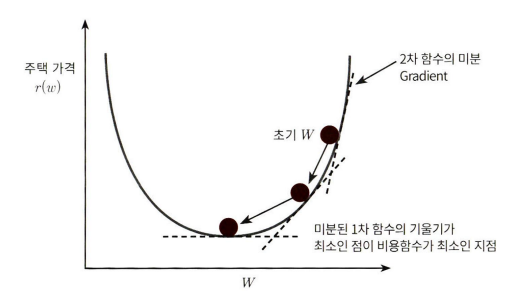 <br>
- Step 1 : w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
- Step 2 : 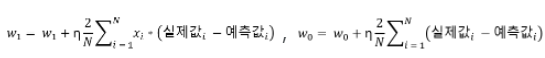로 업데이트 한 뒤 다시 비용 함수 값을 계산합니다. (η: 보정 계수)
- Step 3 : 비용 함수의 값이 감소했으면 Step 2를 반복합니다. 더 이상 감소하지 않는 경우, 그 때의 w1, w0를 구하고 반복을 중지합니다.   

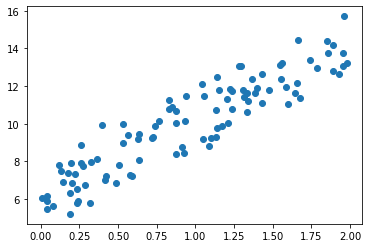

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#y = 4X + 6을 근사(w1=4, w0=6) 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

#X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [3]:
#w1과 w0을 업데이터 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    #먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    #w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    #w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호춣해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [6]:
#최종적으로 예측값과 실제값의 RSS 차이를 계산하는 함수
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1: {0:.3f}, w0: {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022, w0: 6.162
Gradient Descent Total Cost: 0.9935


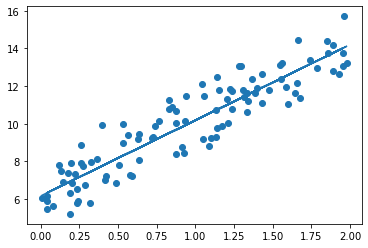

In [7]:
plt.scatter(X,y)
plt.plot(X, y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이터하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있기 때문에 실전에서는 대부분 확률적 경사 하강법을 이용함 <br><br>
- `확률적 경사 하강법 (Stochastic Gradient Descent)`
    - 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장함
    - 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출함

In [8]:
#(미니 배치) 확률적 경사 하강법
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        #전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_x, sample_y로 젖아
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


### [피처가 여러 개인 경우]
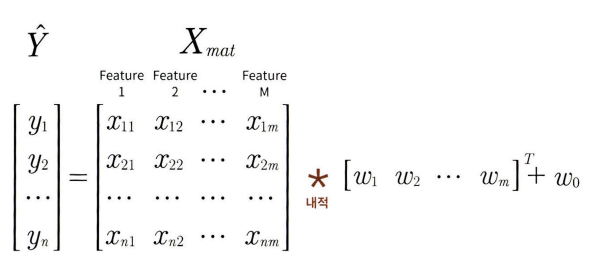
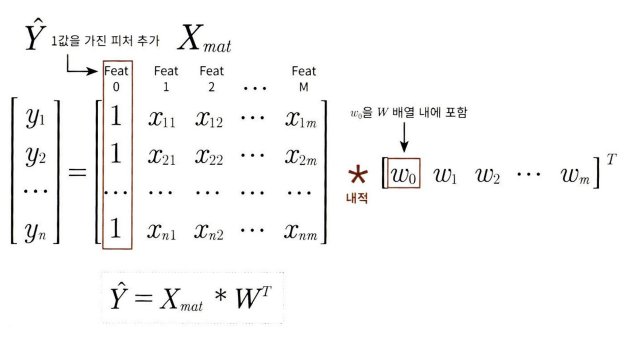

## 05-5 다항 회귀와 과(대)적합 / 과소적합 이해 <br>

### [다항 회귀 이해]
- 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따르는 것이지 독립변수의 선형/비선형 여부와 무관하기 때문에 다항 회귀는 비선형 회귀가 아니고 선형 회귀임 <br>
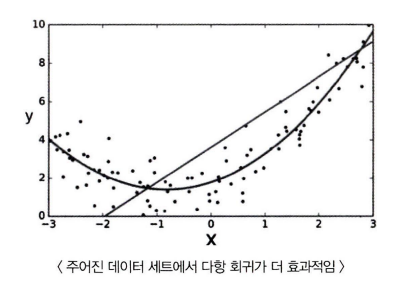 <br>
- 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현함

In [10]:
#단항값 [x1,x2]를 2차 다항값 [1,x1,x2,x1^2,x1x2,x2^2]로 변환하는 예제
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 다항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [11]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [15]:
from sklearn.linear_model import LinearRegression

#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomail 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomail 회귀 Shape: (10,)


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### [다항 회귀를 이용한 과소적합 및 과적합 이해]
- 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐 → 차수가 높아질수록 과적합의 문제가 크게 발생함

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_sampes))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.rand(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.52]입니다.
Degree 1 MSE는 0.3855980524675215입니다.

Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24]입니다.
Degree 4 MSE는 0.005719308263122043입니다.

Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59872000e+03  5.21446800e+04 -4.14476860e+05
  1.80868799e+06 -3.37992441e+06 -6.02684726e+06  5.58440800e+07
 -1.69827424e+08  3.08630277e+08 -3.68966916e+08  2.93847846e+08
 -1.50696588e+08  4.51477248e+07 -6.01510532e+06]입니다.
Degree 15 MSE는 42905665.43770759입니다.


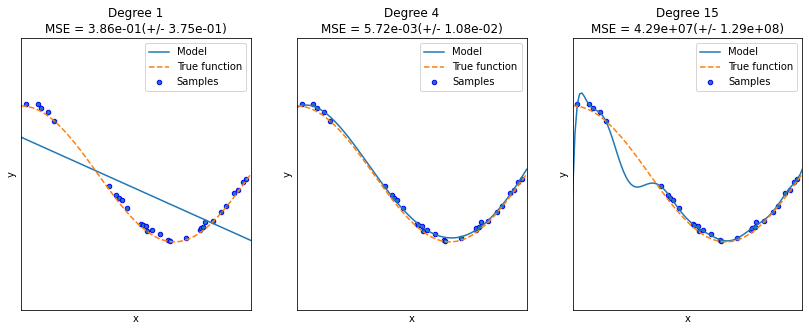

In [30]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

#다항 회귀의 차수 (degree)를 1,4,15로 각각 변화시키면서 비교함
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree별로 Polynomial 변환함
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    #교차 검증으로 다항 회귀를 평가함
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    #Pipeline을 구성하는 세부 객체를 접근하는 named_stpes['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행함
    #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교함
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
    #실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

- 맨 왼쪽은 Degree1 예측 곡선은 단순한 직선으로서 선형 회귀와 똑같음. 실제 데이터 셋을 직선으로 예측하기에는 너무 단순해 보임. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소 적합 모델이 되었음. MSE는 약 0.407임. <br><br>
- 가운데 Degree 4 예측 곡선은 실제 데이터 셋과 유사한 모습임. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 셋을 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었음. MSE는 약 0.043 으로 가장 뛰어난 예측 성능을 나타내고 있음.<br><br>
- 맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 42905665.43770759가 될 정도로 어처구니없는 오류 값이 발생함 (물론 과적합을 강조하기 위해 Degree를 매우 높은 차수인 15로 설정한 결과). 예측 곡선을 보면 데이터 셋의 변동 잡음 값 까지 지나치게 반영한 결과 예측 곡선이 학습 데이터 셋만 정확히 예측하고 테스트 갑스이 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어졌음. 결과적으로 학습 데이터에너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없는 수준의 높은 MSE 값이 나옴.

### [편향-분산 트레이드오프 (Bias-Variance Trade off)
- 앞의 Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우쳐진 경향이 있고 이러한 모델을 고현향 (High Bias)성을 가졌다고 표현함
- 반대로 Degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 되었으며 이러한 모델을 고분산 (High Variance)성을 가졌다고 표현함 <br>
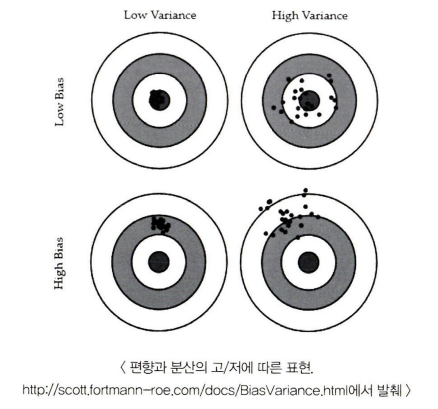 <br>
- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음 <br>
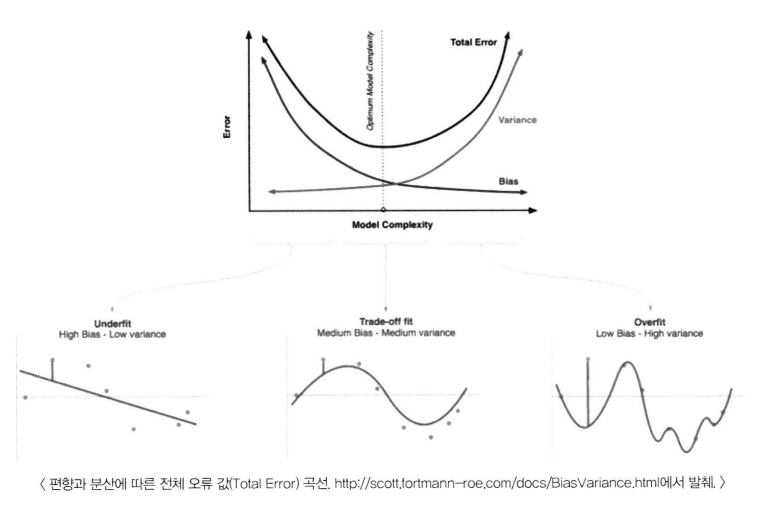 <br>
- 높은 편향 / 낮은 분산에서 과소적합되기 쉬우며 낮은 편향 / 높은 분산에서 과적합되기 쉬움
- 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법임